# Explainable AI

Making models is really cool, but in practice, in businesses people often also want to know why a certain prediction was made. Understanding why predictions are made is the field of Explainable AI. It can be as important, and in some cases, even more important as making the most accurate prediction. 

SHAP (SHapley Additive exPlainations) is a game theoretic approach to explain the output of any machine learning model to increase transparency and interpretability of machine learning models. Consider a coooperative game with the same number of players as the name of features. SHAP will disclose the individual contribution of each player (or feature) on the output of the model, for each example or observation.

*Important: while SHAP shows the contribution or the importance of each feature on the prediction of the model, it does not evaluate the quality of the prediction itself.*

SHAP can thus be applied to all kinds of models. SHAP has different ways of working for different kinds of models, in this notebook we will first go through SHAP for tabular data. We will first make an XG Boost model, which is a tree model. We will use the breast_cancer dataset that has 30 variables and 1 target which is binary and shows whether the person has breast cancer or not. SHAP will help us understand which of these 30 variables made the largest difference in a single prediction. If we calculate the mean SHAP values over all these samples, we can say which of the variables are most important.

In [3]:
from sklearn import datasets
import xgboost
import pandas as pd
import numpy as np

In [2]:
#load the dataset
dataset = datasets.load_breast_cancer()

In [3]:
#show as pd DataFrame
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
#define X and y
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = pd.Series(dataset.target)

In [5]:
from sklearn.model_selection import train_test_split

#define train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#prepare data for xgboost
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [6]:
#set parameters
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

#train model
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

#predictions = model.predict(d_test)

[0]	test-logloss:0.64228
[100]	test-logloss:0.27094
[200]	test-logloss:0.15414
[300]	test-logloss:0.10672
[400]	test-logloss:0.08582
[500]	test-logloss:0.07197
[600]	test-logloss:0.06527
[700]	test-logloss:0.05969
[800]	test-logloss:0.05652
[900]	test-logloss:0.05357
[955]	test-logloss:0.05290


We have a model! Now we can start using the SHAP values to analyze the model

First we have to define the explainer, because XGBoost is a tree model, we will use TreeExplainer.

In [36]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

### Visualize a single prediction

We can visualize a single prediction. 

For this we can use the force plot, which is a way to see the effect of each feature on the prediction, for a given observation. In this plot the positive SHAP values are displayed on the left side and the negative on the right side, as if competing against each other. The highlighted value is the prediction for that observation.



In [41]:
#init javascript in order to display the visuals
shap.initjs()

#item 
observation = 1 #the observation we are checking
print(y.iloc[observation])
shap.force_plot(explainer.expected_value, shap_values[observation,:], X.iloc[observation,:])


0


We can also show all the predictions in one single plot by not slicing as done in the above example

In [44]:
shap.force_plot(explainer.expected_value, shap_values, X)

### Bar chart of mean importance

This takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

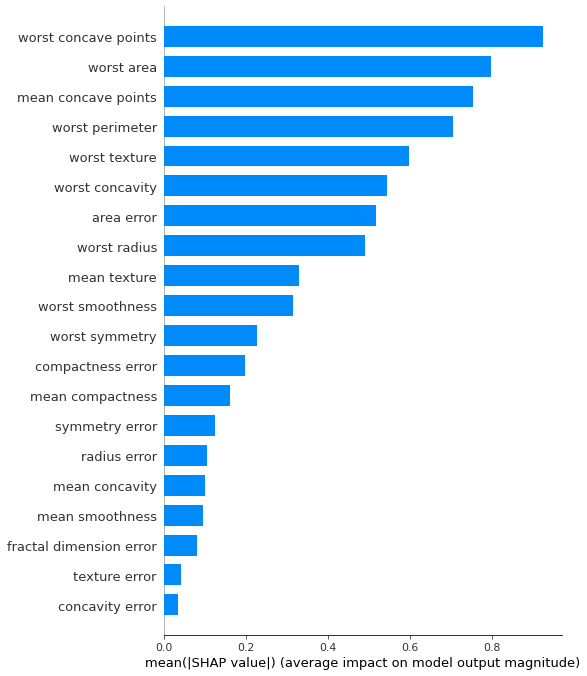

In [45]:
shap.summary_plot(shap_values, X, plot_type="bar")

### SHAP Summary Plot

Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don’t fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

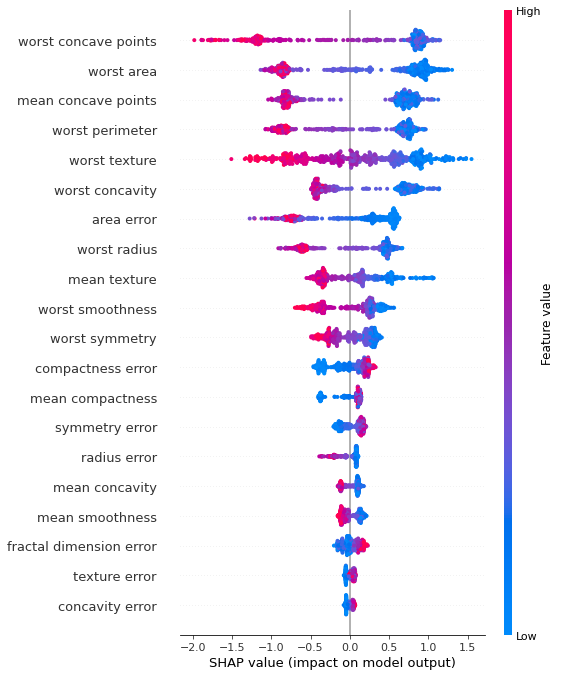

In [46]:
shap.summary_plot(shap_values, X)


So that's it for the tabular data. We can also use SHAP for images. See the next notebook for SHAP on image data.